# Import Dependencies

In [140]:
import pandas as pd
import re
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1). Pengumpulan Data

Dataset yang digunakan merupakan dataset yang didapatkan dari web UCI Dataset dengan nama dataset "Heart Disease". Dalam dataset tersebut terdapat beberapa file data, tetapi pada eksperimen ini file yang digunakan merupakan "Hungarian.data".

Link Dataset: https://archive.ics.uci.edu/dataset/45/heart+disease

#2). Menelaah Data

In [142]:
dir = '/content/drive/MyDrive/heart+disease/hungarian.data'

In [143]:
# Read Data
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [144]:
# Convert the data into DataFrame
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [146]:
# Remove first column because it is an index column
df = df.drop(df.columns[0], axis=1)

# Remove last column because the column containing string values
df = df.iloc[:, :-1]

df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0,40,1,1,0,0,-9,2,140,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
1,0,49,0,1,0,0,-9,3,160,1,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
2,0,37,1,1,0,0,-9,2,130,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
3,0,48,0,1,1,1,-9,4,138,0,...,-9,2,-9,1,1,1,1,1,-9.,-9.
4,0,54,1,1,0,1,-9,3,150,0,...,-9,1,-9,1,1,1,1,1,-9.,-9.


In [147]:
# Change datatype to float
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

***Summary***

1. Menghapus kolom pertama dan terakhir, sehingga total kolom saat ini adalah 74
2. Mengubah datatype dari object menjadi float

#3). Validasi Data

In [148]:
# Change the -9.0 value to Null Value
df.replace(-9.0, np.nan, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [149]:
# Checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

***Summary***
1. Mengubah nilai -9.0 pada dataset menjadi Null / NaN
2. Mengecek ulang adanya kolom dengan missing value didalamnya

#4). Menentukan Objek Data

In [150]:
# Feature Selection
df2 = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]

# Changing column names
df2.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


***Summary***
1. Memilih 14 kolom terbaik
2. Mengubah nama kolom
3. Terdapat 3 kolom dengan missing values lebih dari 60%

#5). Membersihkan Data

In [152]:
# Checking the number of missing values in each column
df2.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [153]:
# Count percentage of missing values in each columns
missing_percentage = (df2.isnull().sum() / len(df2)) * 100

# Get index of columns that have missing values more than 60%
columns_to_drop = missing_percentage[missing_percentage > 60].index

# Drop the columns
df_cleaned = df2.drop(columns=columns_to_drop)
df_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,0.0


In [154]:
df_cleaned = df_cleaned.apply(lambda col: col.fillna(round(col.mean())))

In [155]:
df_cleaned.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [156]:
# Before removing duplicate values
print("Duplicated Rows:")
df_cleaned[df_cleaned.duplicated(keep=False)]

# Remove duplicate values
df_cleaned = df_cleaned.drop_duplicates()

# After removing duplicate values
print("Duplicated Rows:")
df_cleaned[df_cleaned.duplicated(keep=False)]

Duplicated Rows:
Duplicated Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [157]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


<Axes: >

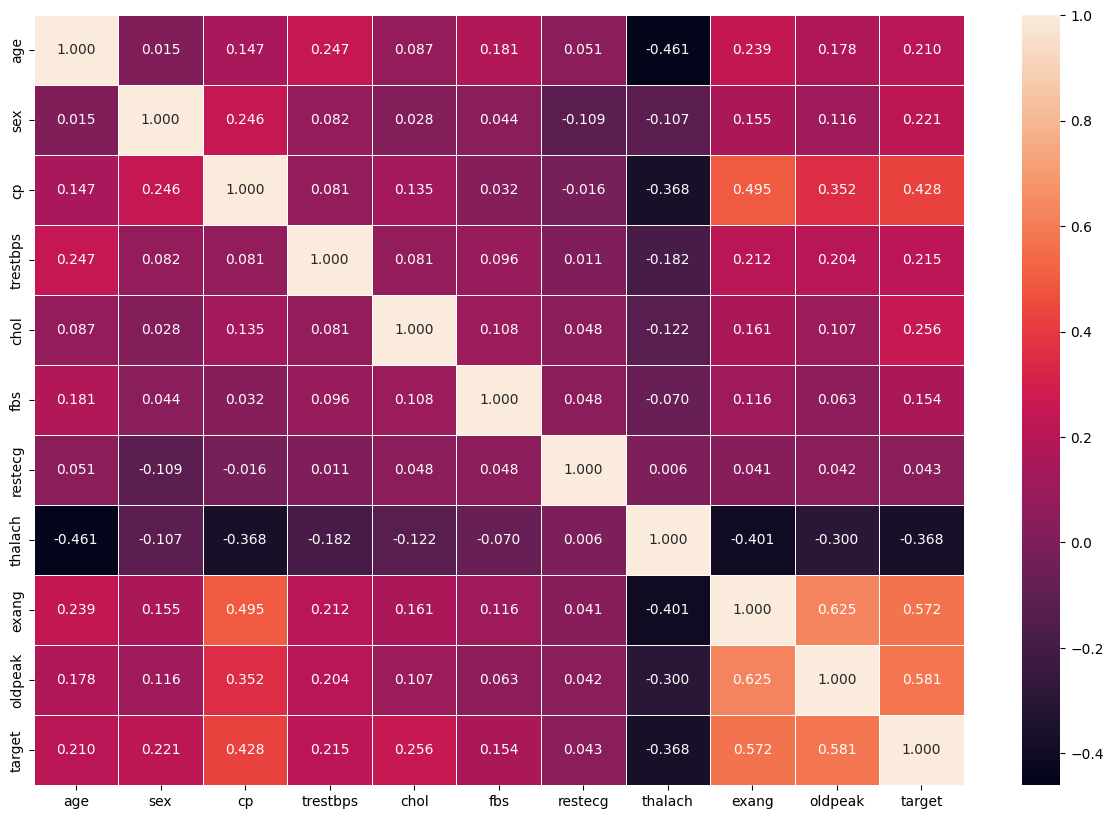

In [158]:
# Displaying heatmap for understanding correlation between each column
cor_mat = df_cleaned.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat, annot=True, linewidths=00.5, fmt=".3f")

***Summary***
1. Menghapus kolom yang memiliki missing values lebih dari 60%
2. Menghapus data duplikat
3. Menampilkan heatmap untuk mengetahui korelasi antar kolom

#6). Konstruksi Data

In [159]:
# Drop target column and assigning rest of the columns into X
X = df_cleaned.drop('target', axis=1).values

# Assigning target coulmns into y
y = df_cleaned.iloc[:, -1]

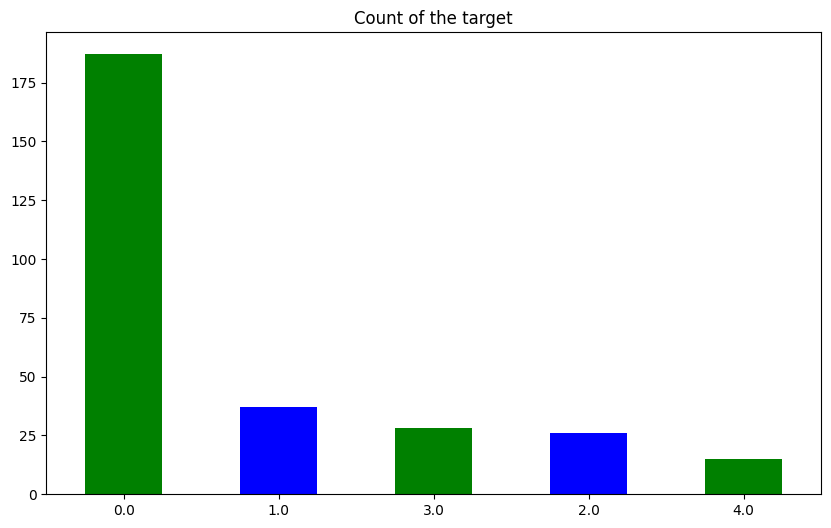

In [160]:
# Display count of the target
df_cleaned['target'].value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue'])
plt.title("Count of the target")
plt.xticks(rotation=0)
plt.show()

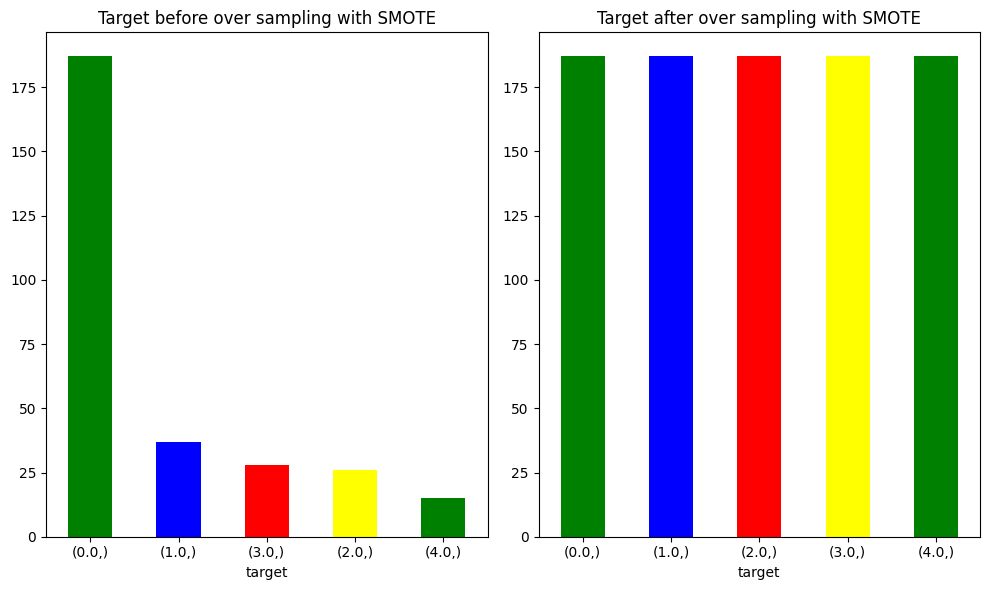

In [161]:
# Oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(12, 4))
new_df1 = pd.DataFrame(data=y)

# Display of the target value before oversampling
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("Target before over sampling with SMOTE")
plt.xticks(rotation=0);

plt.subplot(1,2,2)
new_df2 = pd.DataFrame(data=y_smote_resampled)

# Display of the target value after oversampling
new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("Target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

In [162]:
# Scaling the data
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)

935

In [163]:
# Oversampling data
df_cleaned.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


In [164]:
# Oversampling + Normalization data
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
# Oversampling data
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify= y_smote_resampled)

# Oversampling + normalization data
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify= y_smote_resampled)

***Summary***
1. Menunjukkan jumlah target dalam bentuk diagram
2. Melakukan oversampling
3. Melakukan normalisasi data
4. Melakukan train test split

# 7). Membuat Model

In [166]:
# Function for making confusion matrix
def confusionMatrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.xlabel("True")
  plt.ylabel('Predict')
  plt.show()

# Function to show report classification
def report_classification(y_test, y_pred):
  print("KNN Model:")
  accuracy_knn_smote = round(accuracy_score(y_test, y_pred), 3)
  print("Accuracy:", accuracy_knn_smote)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

## KNN

In [167]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [168]:
y_pred_knn = knn_model.predict(X_test)

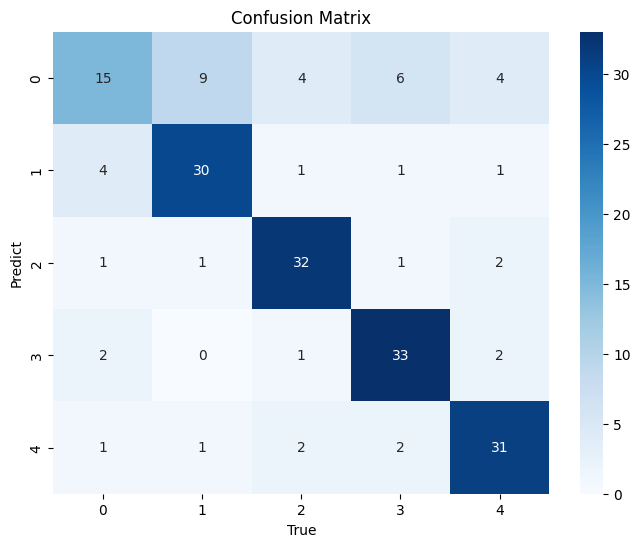

In [169]:
confusionMatrix(y_test, y_pred_knn)

In [170]:
report_classification(y_test, y_pred_knn)

KNN Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [171]:
acc_knn = round(accuracy_score(y_test, y_pred_knn), 3)

## KNN with Normalization

In [172]:
knn_model2 = KNeighborsClassifier(n_neighbors = 3)
knn_model2.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [173]:
y_pred_knn2 = knn_model2.predict(X_test_normal)

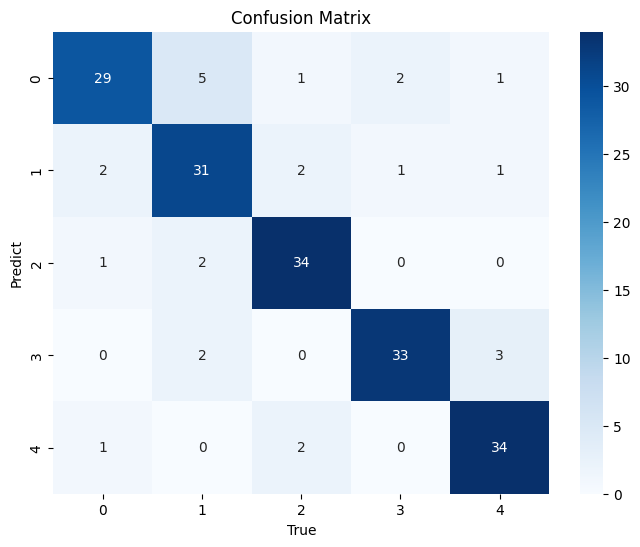

In [174]:
confusionMatrix(y_test_normal, y_pred_knn2)

In [175]:
report_classification(y_test_normal, y_pred_knn2)

KNN Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [176]:
acc_knn_normal = round(accuracy_score(y_test_normal, y_pred_knn2), 3)

## KNN Tuning

In [177]:
knn_model3 = KNeighborsClassifier()
param_grid = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"],
"weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"],
"leaf_size": range(10, 61),
}
knn_model3 = RandomizedSearchCV(estimator=knn_model3, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)
knn_model3.fit(X_train_normal, y_train_normal)

best_params = knn_model3.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 39, 'algorithm': 'kd_tree'}


In [178]:
y_pred_knn3 = knn_model3.predict(X_test_normal)

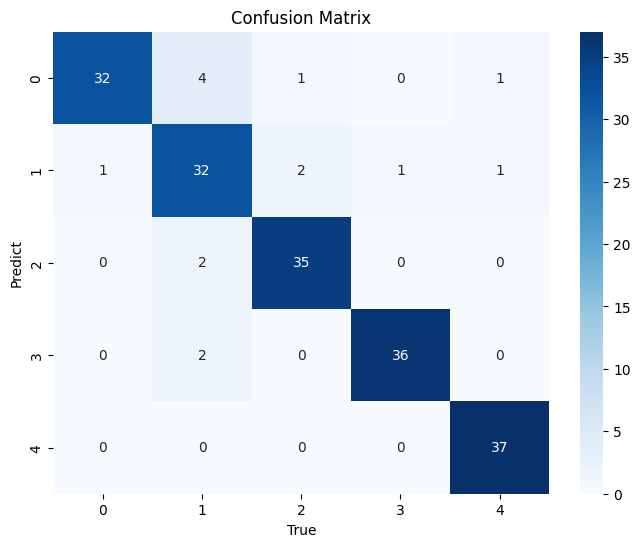

In [179]:
confusionMatrix(y_test_normal, y_pred_knn3)

In [180]:
report_classification(y_test_normal, y_pred_knn3)

KNN Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [181]:
acc_knn_tuning = round(accuracy_score(y_test_normal, y_pred_knn3), 3)

## Random Forest

In [182]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [183]:
y_pred_rf = rf_model.predict(X_test)

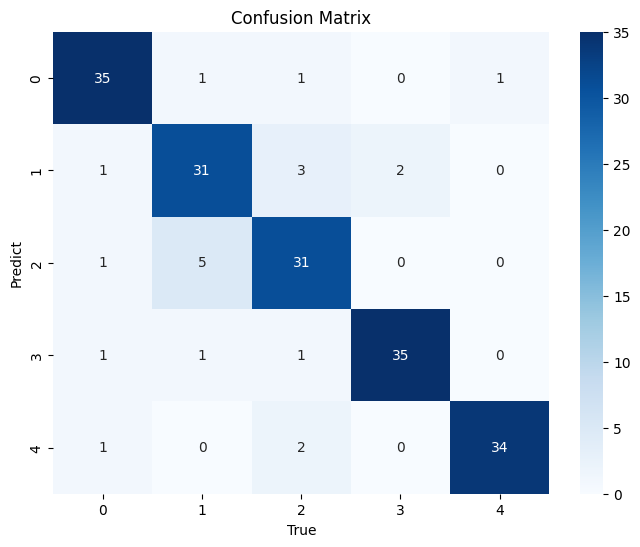

In [184]:
confusionMatrix(y_test, y_pred_rf)

In [185]:
report_classification(y_test, y_pred_rf)

KNN Model:
Accuracy: 0.888
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.82      0.84      0.83        37
         2.0       0.82      0.84      0.83        37
         3.0       0.95      0.92      0.93        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.89      0.89      0.89       187



In [186]:
acc_rf = round(accuracy_score(y_test, y_pred_rf), 3)

## Random Forest with Normalization

In [187]:
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model2.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [188]:
y_pred_rf2 = rf_model2.predict(X_test_normal)

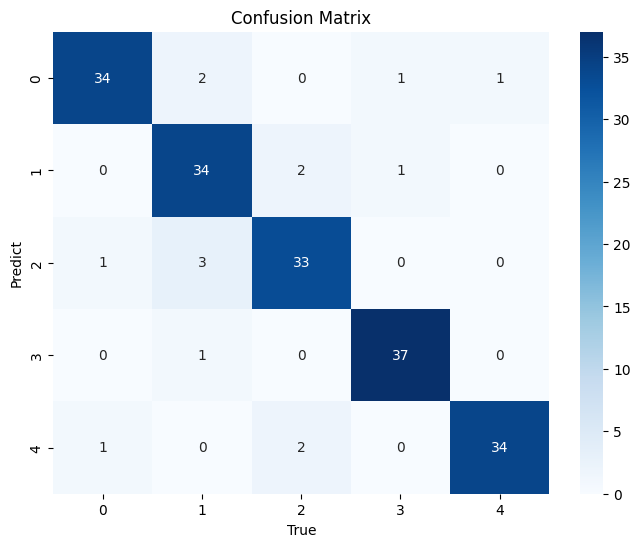

In [189]:
confusionMatrix(y_test_normal, y_pred_rf2)

In [190]:
report_classification(y_test_normal, y_pred_rf2)

KNN Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [191]:
acc_rf_normal = round(accuracy_score(y_test_normal, y_pred_rf2), 3)

## Random Forest Tuning

In [192]:
rf_model3 = RandomForestClassifier()
param_grid = {
"n_estimators": [100, 200],
"max_depth": [ 10, 15],
"min_samples_leaf": [1, 2],
"min_samples_split": [2, 5],
"max_features": ["sqrt", "log2"],
# "random_state": [42, 100, 200]
}
rf_model3 = RandomizedSearchCV(rf_model3, param_grid, n_iter=100, cv=5, n_jobs=-1)
rf_model3.fit(X_train_normal, y_train_normal)
best_params = rf_model3.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [193]:
y_pred_rf3 = rf_model3.predict(X_test_normal)

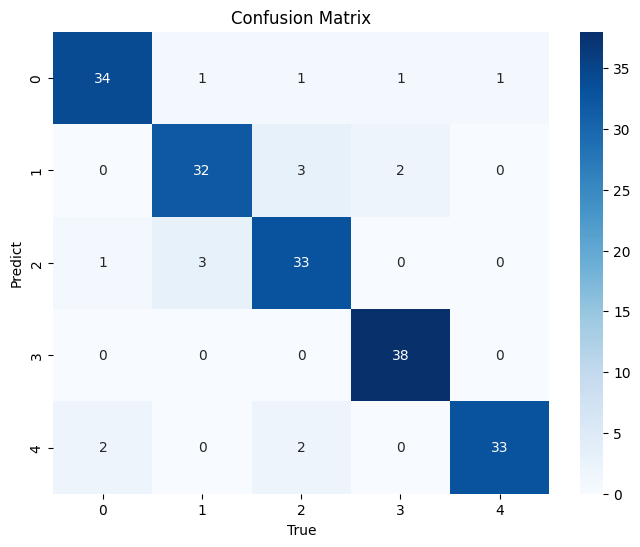

In [194]:
confusionMatrix(y_test_normal, y_pred_rf3)

In [195]:
report_classification(y_test_normal, y_pred_rf3)

KNN Model:
Accuracy: 0.909
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.89      0.86      0.88        37
         2.0       0.85      0.89      0.87        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.89      0.93        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [196]:
acc_rf_tuning = round(accuracy_score(y_test_normal, y_pred_rf3), 3)

## XGBoost

In [197]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [198]:
y_pred_xgb = xgb_model.predict(X_test)

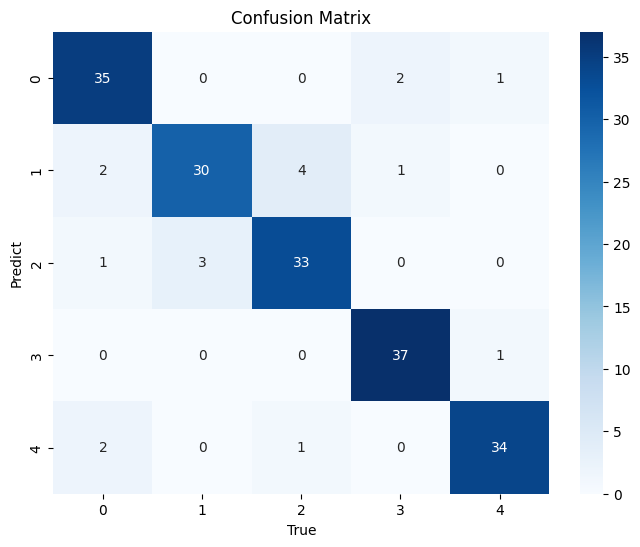

In [199]:
confusionMatrix(y_test, y_pred_xgb)

In [200]:
report_classification(y_test, y_pred_xgb)

KNN Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.91      0.81      0.86        37
         2.0       0.87      0.89      0.88        37
         3.0       0.93      0.97      0.95        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [201]:
acc_xgb = round(accuracy_score(y_test, y_pred_xgb), 3)

## XGBoost with Normalization

In [202]:
xgb_model2 = XGBClassifier(random_state=42)
xgb_model2.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [203]:
y_pred_xgb2 = xgb_model2.predict(X_test_normal)

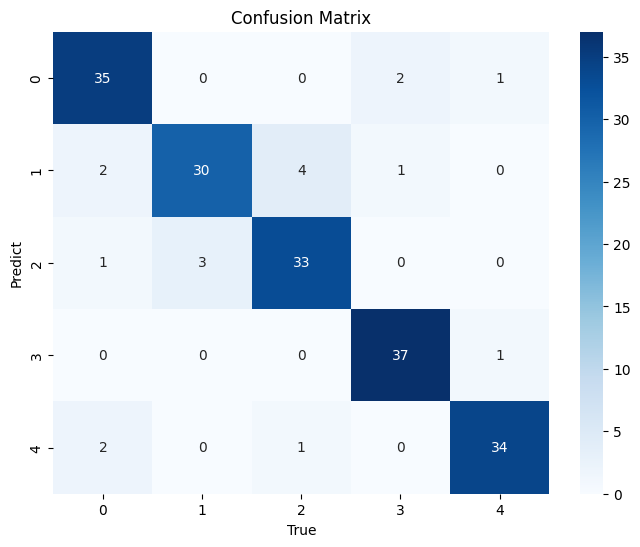

In [204]:
confusionMatrix(y_test_normal, y_pred_xgb2)

In [205]:
report_classification(y_test_normal, y_pred_xgb2)

KNN Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.91      0.81      0.86        37
         2.0       0.87      0.89      0.88        37
         3.0       0.93      0.97      0.95        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [206]:
acc_xgb_normal = round(accuracy_score(y_test_normal, y_pred_xgb2), 3)

## XGBoost Tuning

In [207]:
xgb_model3 = XGBClassifier()
param_grid = {
"max_depth": [3, 5, 7],
"learning_rate": [0.01, 0.1],
"n_estimators": [100, 200],
"gamma": [0, 0.1],
"colsample_bytree": [0.7, 0.8],
}
xgb_model3 = RandomizedSearchCV(xgb_model3, param_grid, n_iter=10, cv=5, n_jobs=-1)
xgb_model3.fit(X_train_normal, y_train_normal)
best_params = xgb_model3.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [208]:
y_pred_xgb3 = xgb_model3.predict(X_test_normal)

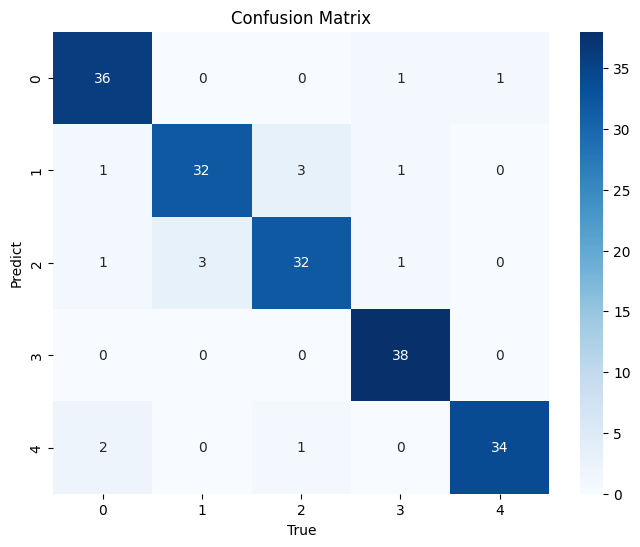

In [209]:
confusionMatrix(y_test_normal, y_pred_xgb3)

In [210]:
report_classification(y_test_normal, y_pred_xgb3)

KNN Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        38
         1.0       0.91      0.86      0.89        37
         2.0       0.89      0.86      0.88        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [211]:
acc_xgb_tuning = round(accuracy_score(y_test_normal, y_pred_xgb3), 3)

#8). Evaluasi

In [212]:
# Without Normalization
model_comp1 = pd.DataFrame({'Model': ['KNN', 'Random Forest', 'XGBoost'], 'Accuracy': [acc_knn*100, acc_rf*100, acc_xgb*100]})
model_comp1.head()

,Model,Accuracy
0,KNN,75.4
1,Random Forest,88.8
2,XGBoost,90.4


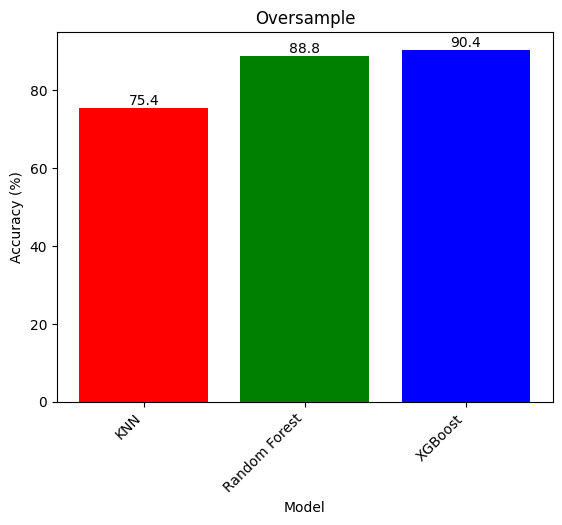

In [213]:
# Making bar plot
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right')

# Showing percentage above the bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [214]:
# With Normalization
model_comp2 = pd.DataFrame({'Model': ['KNN', 'Random Forest', 'XGBoost'], 'Accuracy': [acc_knn_normal*100, acc_rf_normal*100, acc_xgb_normal*100]})
model_comp2.head()

,Model,Accuracy
0,KNN,86.1
1,Random Forest,92.0
2,XGBoost,90.4


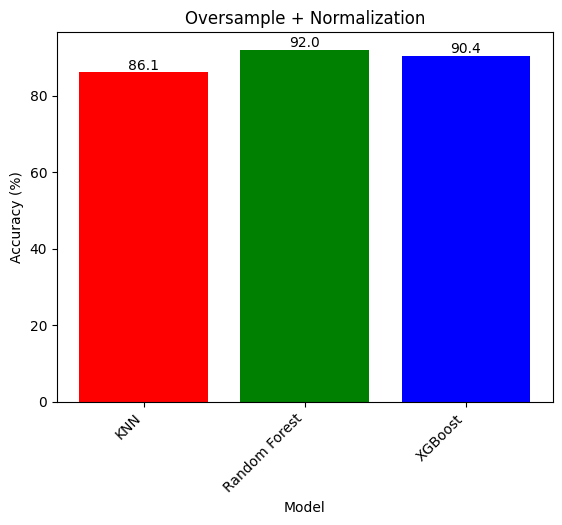

In [219]:
# Making bar plot
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample + Normalization')
plt.xticks(rotation=45, ha='right')

# Showing percentage above the bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [216]:
# Tuning
model_comp3 = pd.DataFrame({'Model': ['KNN', 'Random Forest', 'XGBoost'], 'Accuracy': [acc_knn_tuning*100, acc_rf_tuning*100, acc_xgb_tuning*100]})
model_comp3.head()

,Model,Accuracy
0,KNN,92.0
1,Random Forest,90.9
2,XGBoost,92.0


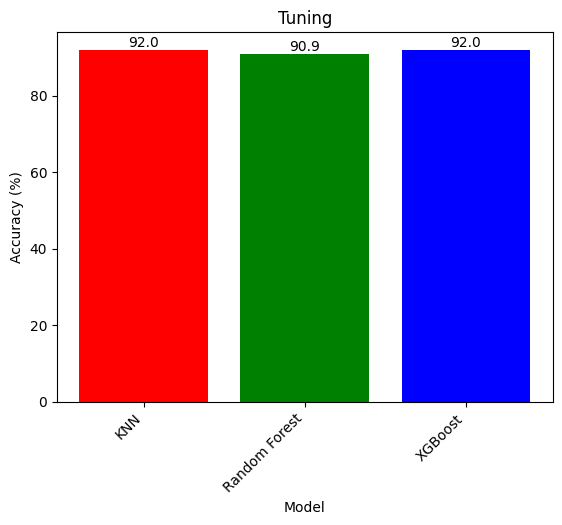

In [220]:
# Making bar plot
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Tuning')
plt.xticks(rotation=45, ha='right')

# Showing percentage above the bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

#9). Kesimpulan

Dari eksperimen diatas, setelah melakukan pemodelan dengan algoritma KNN, Random Forest, dan XGBoost dengan berbagai penanganan data antara lain menggunakan random over sampling SMOTE untuk penanganan imbalance data dan Normalisasi data. Didapatkan hasil klasifikasi untuk data yang telah dilakukan oversampling yaitu KNN dengan akurasi sebesar 75.4%, Random Forest 88.8% dan XGBoost sebesar 90.4%. Kemudian untuk hasil klasigikasi data yang telah dilakukan oversampling dan XGBoost dengan akurasi sebesar 90.4% dan KNN sebesar 76.1%. Berikutnya untuk model yang dilakukan tuning, KNN dan XGBoost sama sama mendapatkan akurasi sebesar 92% dan Random Forest sebesar 90.9%. Dari eksperimen yang dilakukan, XGBoost merupakan algoritma yang performanya paling stabil, dengan akurasi tertingginya sebesar 92% dan terendahnya sebesar 90.4%. Sedangkan untuk algoritma yang performanya paling tidak stabil adalah KNN, dengan akurasi tertingginya sebesar 92% dan terendahnya sebesar 75%.